In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
import json
import numpy as np

In [2]:
text = []
label = []

with open("../../data/domain1_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])


In [3]:
vector_sample = [np.arange(5000).tolist()]
vector_sample.append(text)
print("instance size:", len(text))

instance size: 19500


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

def toStr(n):
   return str(n)

# Create a Vectorizer Object
vectorizer = CountVectorizer(preprocessor= toStr, analyzer="word", token_pattern=r"(?u)\b\w+\b", ngram_range=(1, 1))

vectorizer.fit(vector_sample)

# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
# print("Encoded Document is:")
# print(vector.toarray())

In [5]:
len(vectorizer.vocabulary_)
vector.toarray().shape

(19500, 5000)

In [6]:
X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (19500, 5000)
Shape of y: (19500,)


In [7]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [10]:
print(preds)
print(y_test)

[0 1 0 ... 1 1 1]
[0 0 0 ... 1 1 0]


In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(bst, X, y, cv=10)

array([0.86923077, 0.88410256, 0.89282051, 0.8825641 , 0.89179487,
       0.89282051, 0.89692308, 0.89435897, 0.87641026, 0.88205128])

In [ ]:
scores = []
for i in range(2, 37, 5):
    bst = XGBClassifier(n_estimators=2, max_depth=i, learning_rate=1, objective='binary:logistic')
    score = sum(cross_val_score(bst, X, y, cv=10))/10
    scores.append(score)

print(scores)

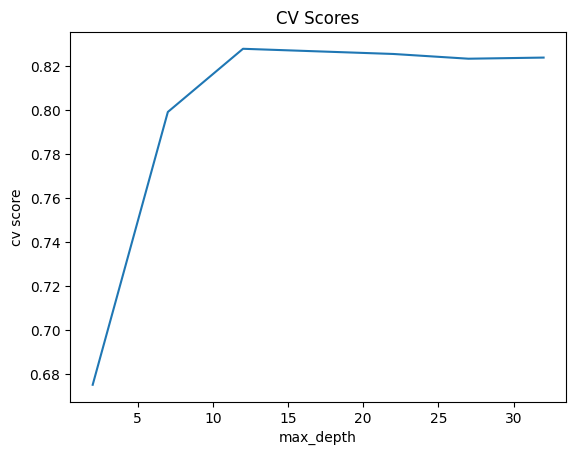

In [ ]:
import matplotlib.pyplot as plt

# plotting the points 
plt.plot(range(2, 37, 5), scores)
  
# naming the x axis
plt.xlabel('max_depth')
# naming the y axis
plt.ylabel('cv score')
  
# giving a title to my graph
plt.title('CV Scores')
  
# function to show the plot
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

text = []
label = []

with open("../../data/domain1_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])

with open("../../data/domain2_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Encoded Document is:
[[7 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [6 1 0 ... 0 0 0]
 ...
 [3 5 2 ... 3 0 0]
 [0 5 3 ... 0 0 0]
 [2 5 4 ... 0 0 0]]
Shape of X: (34400, 5000)
Shape of y: (34400,)


In [20]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC # Numerical & Categorical
from imblearn.over_sampling import SMOTEN # Categorical

# X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print(f'Original dataset shape {X.shape}')
print(f'Original dataset samples per class {Counter(y)}')

# simulate the 2 last columns to be categorical features
# X[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Original dataset shape (34400, 5000)
Original dataset samples per class Counter({0: 22500, 1: 11900})
Resampled dataset samples per class Counter({1: 22500, 0: 22500})


In [21]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_res, y_res)

sum(cross_val_score(bst, X_res, y_res, cv=10)) / 10

# scores = []
# n = 10
# for i in range(2, 6, 1):
#     clf = RandomForestClassifier(max_depth=i, random_state=0)
#     score = sum(cross_val_score(clf, X, y, cv=n)) / n
#     scores.append(score)

# print(scores)

0.7723333333333333

In [22]:
text = []

with open("../../data/test_set.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])

In [23]:
# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

X = vector.toarray()

print("Shape of X:", X.shape)

Encoded Document is:
[[32 14  3 ...  0  0  0]
 [ 2 11  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]
 [27 18  6 ...  0  0  0]]
Shape of X: (1000, 5000)


In [24]:
import pandas as pd

y = bst.predict(X)
print(y)

result = pd.DataFrame({"class":y}).reset_index().rename(columns = {'index':'id'})
result.to_csv("./result_XGB_res.csv", index=False)

[0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 1 